# 作業重點:

(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
    
    取得各種優化器的運算結果

In [2]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 

Using TensorFlow backend.


In [3]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0726 14:43:53.470327 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 14:43:53.511304 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 14:43:53.517301 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [5]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

# SGD

In [6]:
#第三步編譯 & 優化器設定
'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'''
Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

'''

opt = optimizers. SGD(lr=0.001, momentum=0.001, decay=0.0, nesterov=True)
 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

W0726 14:43:53.841119 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 14:43:53.855107 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0726 14:43:53.865101 50368 deprecation.py:323] From D:\python\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [7]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 128
epochs = 10

In [8]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0726 14:36:08.115012 53236 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 6s - loss: 0.8025 - acc: 0.9190 - val_loss: 0.5482 - val_acc: 0.9396
Epoch 2/10
 - 4s - loss: 0.3891 - acc: 0.9549 - val_loss: 0.4150 - val_acc: 0.9502
Epoch 3/10
 - 4s - loss: 0.3285 - acc: 0.9611 - val_loss: 0.3388 - val_acc: 0.9591
Epoch 4/10
 - 4s - loss: 0.2957 - acc: 0.9642 - val_loss: 0.3148 - val_acc: 0.9618
Epoch 5/10
 - 4s - loss: 0.2734 - acc: 0.9666 - val_loss: 0.3206 - val_acc: 0.9598
Epoch 6/10
 - 4s - loss: 0.2581 - acc: 0.9680 - val_loss: 0.3067 - val_acc: 0.9623
Epoch 7/10
 - 4s - loss: 0.2461 - acc: 0.9697 - val_loss: 0.3114 - val_acc: 0.9611
Epoch 8/10
 - 4s - loss: 0.2373 - acc: 0.9708 - val_loss: 0.2892 - val_acc: 0.9640
Epoch 9/10
 - 4s - loss: 0.2297 - acc: 0.9718 - val_loss: 0.2873 - val_acc: 0.9638
Epoch 10/10
 - 4s - loss: 0.2236 - acc: 0.9728 - val_loss: 0.2967 - val_acc: 0.9623


In [9]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.2939115628600121, 0.9628199899196624]

 The accuracy of the model is 0.810400 


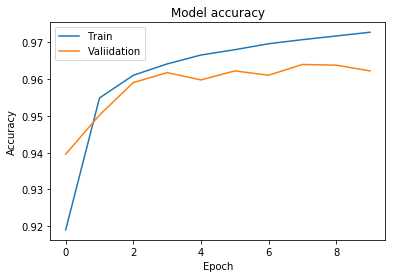

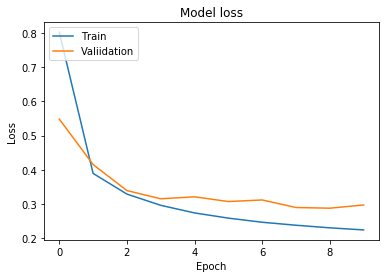

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# regulate the batch size and the epochs of the sgd optimizer

In [8]:
batch_size = 32
epochs = 15

In [9]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0726 14:44:35.133482 50368 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 15s - loss: 0.5018 - acc: 0.9453 - val_loss: 0.1555 - val_acc: 0.9755
Epoch 2/15
 - 14s - loss: 0.1047 - acc: 0.9819 - val_loss: 0.1035 - val_acc: 0.9820
Epoch 3/15
 - 17s - loss: 0.0628 - acc: 0.9877 - val_loss: 0.0866 - val_acc: 0.9840
Epoch 4/15
 - 15s - loss: 0.0437 - acc: 0.9908 - val_loss: 0.0822 - val_acc: 0.9841
Epoch 5/15
 - 14s - loss: 0.0316 - acc: 0.9932 - val_loss: 0.0748 - val_acc: 0.9854
Epoch 6/15
 - 15s - loss: 0.0236 - acc: 0.9947 - val_loss: 0.0706 - val_acc: 0.9860
Epoch 7/15
 - 16s - loss: 0.0185 - acc: 0.9960 - val_loss: 0.0690 - val_acc: 0.9863
Epoch 8/15
 - 15s - loss: 0.0147 - acc: 0.9971 - val_loss: 0.0694 - val_acc: 0.9861
Epoch 9/15
 - 12s - loss: 0.0121 - acc: 0.9978 - val_loss: 0.0686 - val_acc: 0.9862
Epoch 10/15
 - 13s - loss: 0.0104 - acc: 0.9982 - val_loss: 0.0663 - val_acc: 0.9867
Epoch 11/15
 - 13s - loss: 0.0089 - acc: 0.9986 - val_loss: 0.0653 - val_acc: 0.9869
Epoch 12/15
 - 13s - los

In [10]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.059149682671995836, 0.9877900242805481]

 The accuracy of the model is 0.938300 


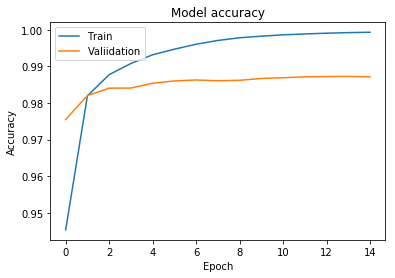

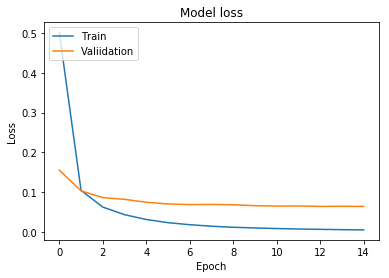

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# ADAM

In [11]:
# 第三步：編譯, 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [13]:
batch_size = 128
epochs = 10

In [14]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 5s - loss: 2.8600 - acc: 0.8211 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 6/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 7/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 8/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 9/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 10/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201


In [15]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8751834774017335, 0.8206400120258331]

 The accuracy of the model is 0.103200 


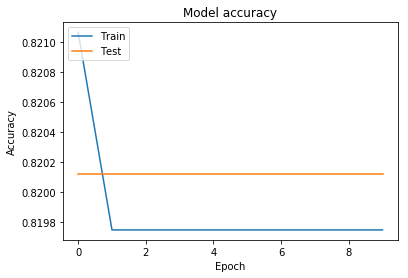

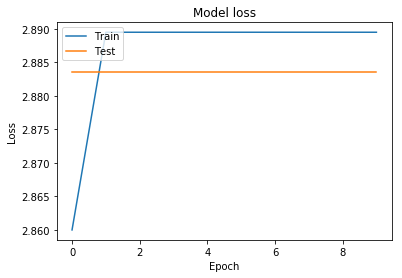

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# regulate the batch size and the epochs of the adam optimizer

In [12]:
# 第三步：編譯, 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [14]:
batch_size = 32
epochs = 15

In [15]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
 - 19s - loss: 2.8749 - acc: 0.8205 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 2/15
 - 20s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 3/15
 - 23s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 4/15
 - 21s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 5/15
 - 21s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 6/15
 - 20s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 7/15
 - 18s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 8/15
 - 18s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 9/15
 - 18s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 10/15
 - 18s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 11/15
 - 18s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 12/15
 - 21s - los

In [16]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8989082527160646, 0.8191600251197815]

 The accuracy of the model is 0.095800 


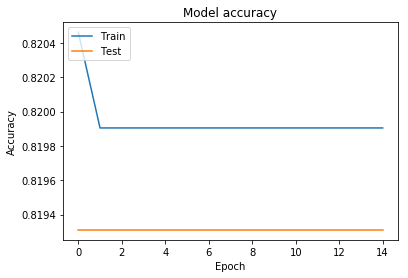

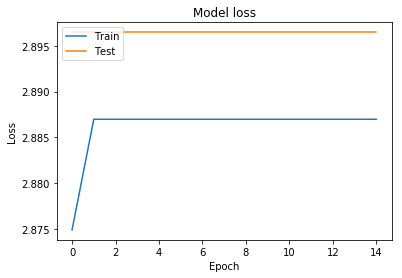

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Rmsprop

In [17]:
# 第三步：編譯, 
model.compile(optimizer = 'Rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [19]:
batch_size = 128
epochs = 10

In [20]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 6/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 7/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 8/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 9/10
 - 5s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 10/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201


In [21]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8751834774017335, 0.8206400120258331]

 The accuracy of the model is 0.103200 


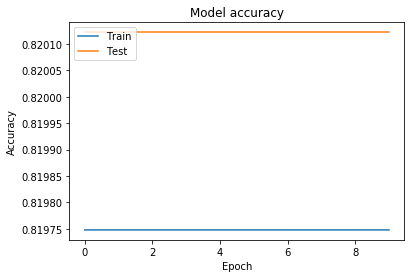

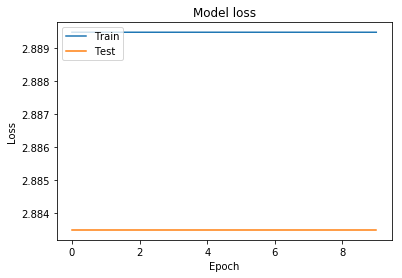

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()